# TESLA

#### Paso 1: Instalación de dependencias

In [84]:

import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import time
import sqlite3
import matplotlib.pyplot as plt

#### Paso 2: Descargar HTML

In [85]:

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Configura encabezados personalizados para simular una solicitud de navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

response = requests.get(url, headers=headers)
time.sleep(10)
if response.status_code == 200:
    # Paso 3: Transforma el HTML
    soup = bs(response.text, "html.parser")


#### Paso 3: Transforma el HTML

In [86]:
# 1. Buscar todas las tablas.
# 2. Encontrar la tabla con la evolución trimestral.
revenues = soup.find_all('table', class_="historical_data_table")[1] # Seleciono la segunda tabla, donde están los datos trimestrales

df = pd.DataFrame(columns = ["Date", "Revenue"])
list1 = []
list2 = []

rows = revenues.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    if len(cols) == 0:
        continue
    else:
        list1.append(cols[0].text)
        list2.append(cols[1].text)

# 3. Almacena los datos en un DataFrame.
df = pd.DataFrame({'Date': list1, 'Revenue': list2})
df.head(10)


,Date,Revenue
0,2023-09-30,"$23,350"
1,2023-06-30,"$24,927"
2,2023-03-31,"$23,329"
3,2022-12-31,"$24,318"
4,2022-09-30,"$21,454"
5,2022-06-30,"$16,934"
6,2022-03-31,"$18,756"
7,2021-12-31,"$17,719"
8,2021-09-30,"$13,757"
9,2021-06-30,"$11,958"


#### Paso 4: Procesa el DataFrame

In [87]:
# Limpia las filas eliminando "$", comas y celdas vacías o sin info
def clean_data(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '') 
        value = value.strip() 
        if value == '':
            return None  # Convierte a None si el valor está vacío
        else:
            return value
    else:
        return value

# Aplica la función de limpieza a las columnas 'Date' y 'Revenue'
df['Date'] = df['Date'].apply(clean_data)
df['Revenue'] = df['Revenue'].apply(clean_data)

# Elimina filas con valores nulos o vacíos
df = df.dropna()
df.head(10)


,Date,Revenue
0,2023-09-30,23350
1,2023-06-30,24927
2,2023-03-31,23329
3,2022-12-31,24318
4,2022-09-30,21454
5,2022-06-30,16934
6,2022-03-31,18756
7,2021-12-31,17719
8,2021-09-30,13757
9,2021-06-30,11958


#### Paso 5: Almacena los datos en sqlite

In [88]:
# 1. Crea la tabla.
# 2. Inserta los valores.
# 3. Almacena (``commit`) los cambios.

con = sqlite3.connect('tesla_revenue.db')
cursor = con.cursor()

create_table_query = '''
CREATE TABLE IF NOT EXISTS Tesla_quaterly_revenue (
    id INTEGER PRIMARY KEY,
    Date TEXT,
    Revenue REAL
);
'''
cursor.execute(create_table_query)

for index, row in df.iterrows():
    date = row['Date']
    revenue = row['Revenue']
    insert_query = 'INSERT INTO Tesla_quaterly_revenue (Date, Revenue) VALUES (?, ?);'
    cursor.execute(insert_query, (date, revenue))

con.commit()

con.close()

#### Paso 6: Visualiza los datos

He intentado agrupar los ingresos por año, para que la gráfica se vea mejor y más limpia, pero me dan errores.

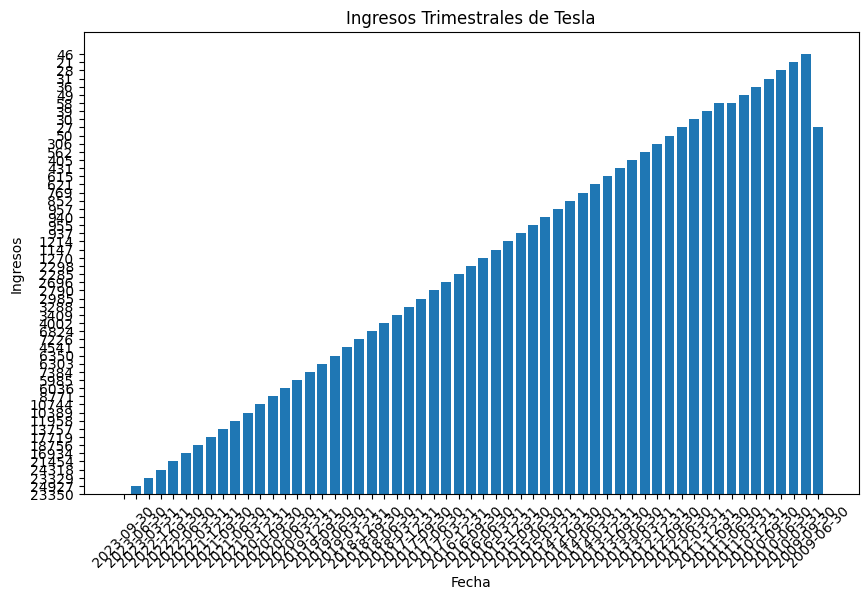

In [89]:
# ¿Qué tipos de visualizaciones podemos realizar?
# Propón al menos 3 y muéstralos.

# GRÁFICO DE BARRAS:

plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Revenue'])
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Ingresos Trimestrales de Tesla')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.show()



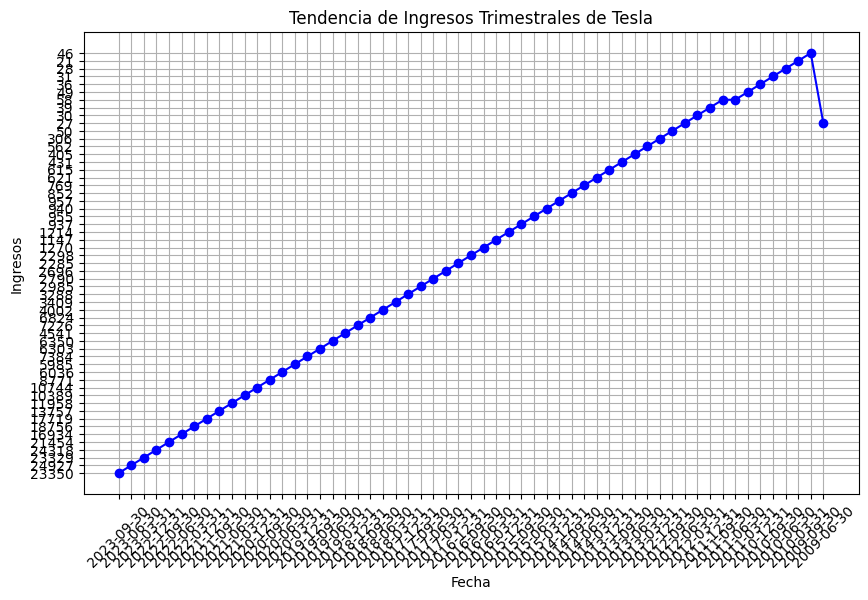

In [90]:
# GRÁFICO DE LÍNEAS:

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Revenue'], marker='o', linestyle='-', color='b')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Tendencia de Ingresos Trimestrales de Tesla')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


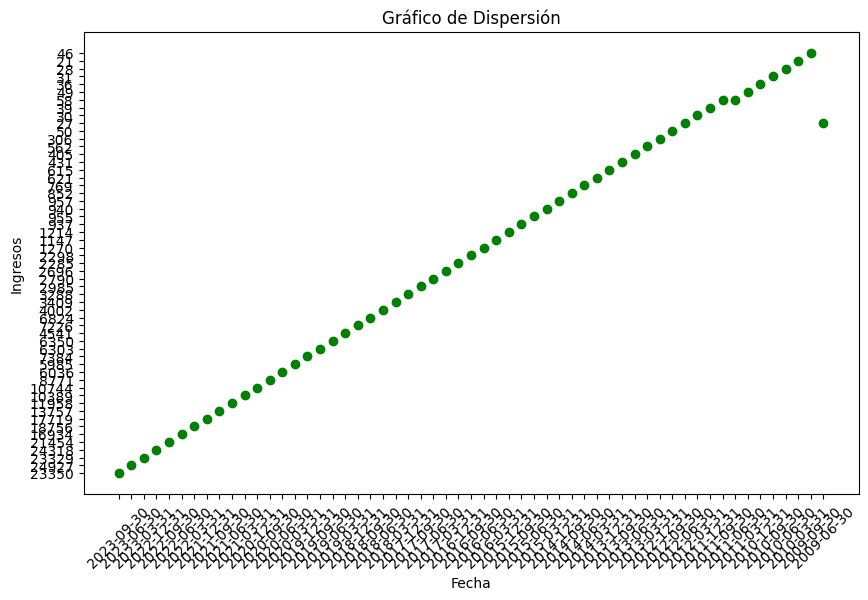

In [91]:
# GRÁFICO DE DISPERSIÓN:

plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Revenue'], color='g', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión')
plt.xticks(rotation=45)
plt.show()



# TURTLES

##### Aquí no me funciona, pero en mi VSCode sin problema

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re

option = webdriver.ChromeOptions()
option.add_argument("--headless")

driver = webdriver.Chrome(options=option)
driver.get("https://www.scrapethissite.com/pages/frames/")

time.sleep(20)
driver.switch_to.frame("iframe")

turtles = driver.find_elements(By.CLASS_NAME, 'btn')
turtle_name = []
turtle_description = []
info = [ds.get_attribute('href') for ds in turtles]

for description in info:
    # automatizar interacciones en el navegador 
    driver_turtle = webdriver.Chrome(options=option) 
    driver_turtle.get(description)
    turtle_name.append(driver_turtle.find_element(By.CLASS_NAME, 'family-name').text)
    turtle_description.append(driver_turtle.find_element(By.CLASS_NAME, "lead").text)
    driver_turtle.close()
driver.quit()
exg_ = r'\d+'


year_turtle = []
for description in turtle_description:
    num = re.findall(exg_, description)
    year_turtle.extend(num)
year_turtle = [int(number) for number in year_turtle]
table_turtle = pd.DataFrame({'Scientific Name': turtle_name, 'Year of Discovery' : year_turtle})
table_turtle.set_index(pd.Index(range(1, len(turtle_name) + 1)), inplace=True)
table_turtle

# TEAMS HOCKEY